In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn as sns # This line was redundant and not used, can be removed if not needed for other purposes.
from sklearn.tree import plot_tree

In [2]:
import pandas as pd
# Load the dataset
df = pd.read_csv('/content/sample_data/drug200.csv')
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [3]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


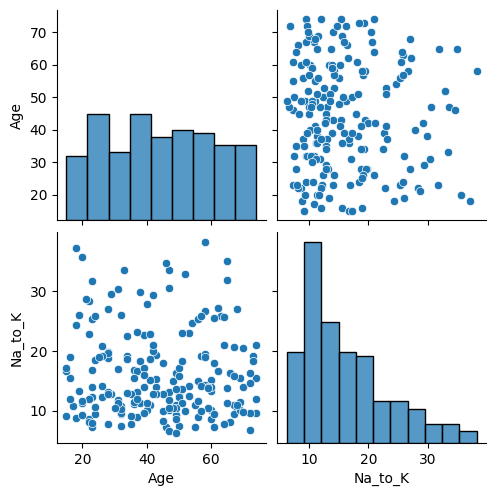

In [6]:
import seaborn as sns
sns.pairplot(df)

<Axes: >

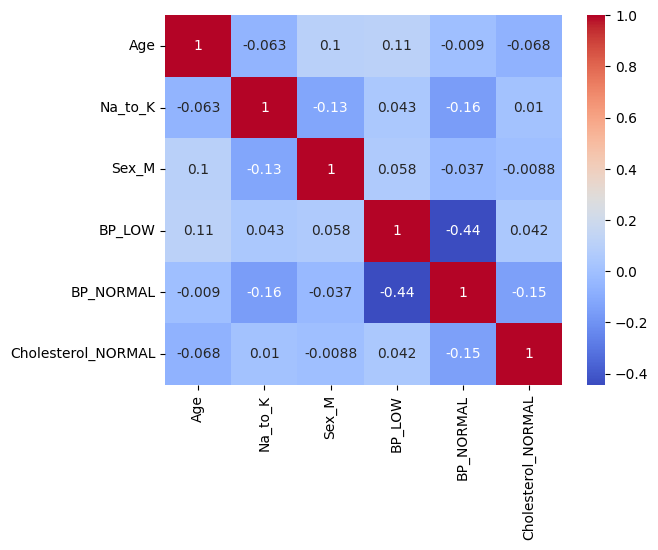

In [55]:
data = df.drop(['Drug'],axis=1)
data_encoded = pd.get_dummies(data, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)
correlation_matrix = data_encoded.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')

In [21]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

<Axes: xlabel='Drug', ylabel='count'>

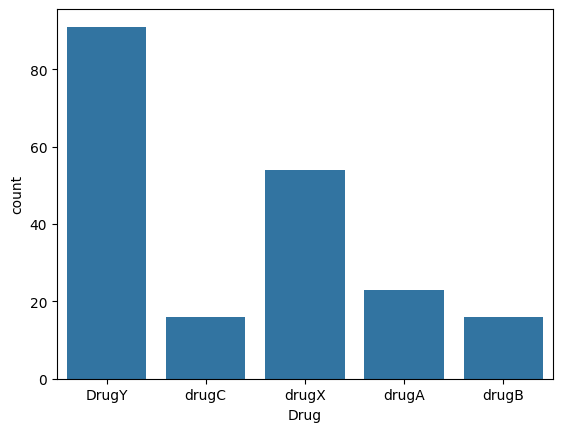

In [24]:
sns.countplot(x = 'Drug', data = df)

In [37]:
x = df[['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', ]]
y = df['Drug']

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [39]:
# Apply one-hot encoding to categorical features
x_train_encoded = pd.get_dummies(x_train, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)
x_test_encoded = pd.get_dummies(x_test, columns=['Sex', 'BP', 'Cholesterol'], drop_first=True)

model = DecisionTreeClassifier()
model.fit(x_train_encoded, y_train)

DecisionTreeClassifier()

In [42]:
y_pred = model.predict(x_test_encoded)
print(y_pred)

['drugX' 'DrugY' 'drugX' 'drugC' 'DrugY' 'DrugY' 'DrugY' 'drugX' 'drugA'
 'drugX' 'drugA' 'drugX' 'DrugY' 'drugA' 'drugB' 'DrugY' 'drugB' 'drugX'
 'drugC' 'DrugY' 'drugB' 'drugX' 'drugX' 'DrugY' 'DrugY' 'DrugY' 'drugC'
 'drugX' 'DrugY' 'drugX' 'DrugY' 'drugC' 'drugC' 'DrugY' 'drugA' 'DrugY'
 'drugX' 'drugA' 'DrugY' 'drugA']


In [45]:
from sklearn.metrics import accuracy_score
# Accuracy Score
accuracy_score(y_test, y_pred)
print(f"accuracy_score: {accuracy_score(y_test, y_pred)}")

accuracy_score: 1.0


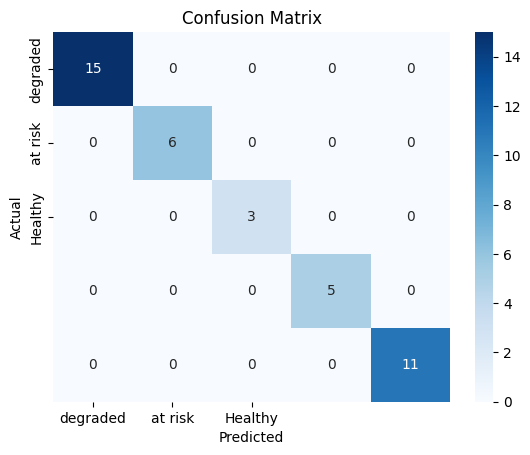

In [50]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
#Confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['degraded','at risk' ,'Healthy'],
            yticklabels=['degraded','at risk' ,'Healthy'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [53]:
from sklearn.metrics import classification_report
import numpy as np # Import numpy for np.unique
print(classification_report(y_test,y_pred,target_names=np.unique(y_test)))

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        15
       drugA       1.00      1.00      1.00         6
       drugB       1.00      1.00      1.00         3
       drugC       1.00      1.00      1.00         5
       drugX       1.00      1.00      1.00        11

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

